In [1]:
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, StratifiedKFold
#
import sklearn.metrics as metrics
#

C:\Users\lenovo\anaconda3\envs\SentimentCapstone\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def conf_matrix(cm):

    plt.figure(figsize=(9,9))
    ax = sns.heatmap(cm,
                     annot= True,
                     fmt = '.4g',
                     cbar=0,
                     xticklabels=[1,2,3,4],
                     yticklabels=[1,2,3,4])

    plt.show()

In [3]:
x_train = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject3\Data\CEV_contest_train_dataset.csv')
y_train = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject3\Data\CEV_contest_train_dataset_labels.csv')

In [4]:
x_test = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject3\Data\CEV_contest_test_dataset.csv')

In [22]:
x_test = x_test.drop(['Unnamed: 0'], axis=1)

# Y- Label to 4 class and int

In [5]:
x_train = x_train.drop(['Unnamed: 0'], axis=1)
y_train = y_train.drop(['Unnamed: 0'], axis=1)

In [6]:
y_train = (y_train * 100)
y_train = y_train.apply(np.int64)
y_train

,CDRGLOB
0,0
1,50
2,0
3,25
4,25
...,...
5279,25
5280,0
5281,0
5282,25


# Train- Validation Split

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                    y_train,
                                                    test_size=.2,
                                                    random_state=42)

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(4227, 29)
(4227, 1)
(1057, 29)
(1057, 1)


# Modelling

# Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\lenovo\anaconda3\envs\SentimentCapstone\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best: 0.989589 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.989589 (0.005523) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.920833 (0.015633) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.936205 (0.011801) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.987461 (0.005962) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.921614 (0.017593) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.933681 (0.011184) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.982651 (0.006388) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.917360 (0.020116) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.930132 (0.011122) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.963724 (0.008408) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.910422 (0.013023) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.921457 (0.010820) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.869564 (0.014122) wit

In [10]:
LG_classifier = LogisticRegression(C=100, penalty='l2',solver='newton-cg')
LG_classifier.fit(x_train, y_train)

C:\Users\lenovo\anaconda3\envs\SentimentCapstone\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100, solver='newton-cg')

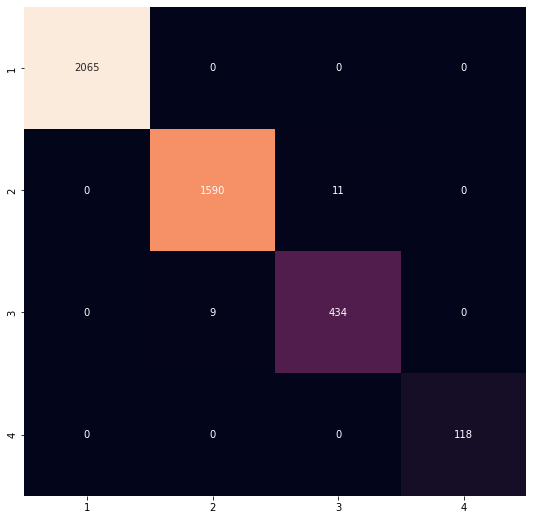

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = LG_classifier.predict(x_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
conf_matrix(cm)

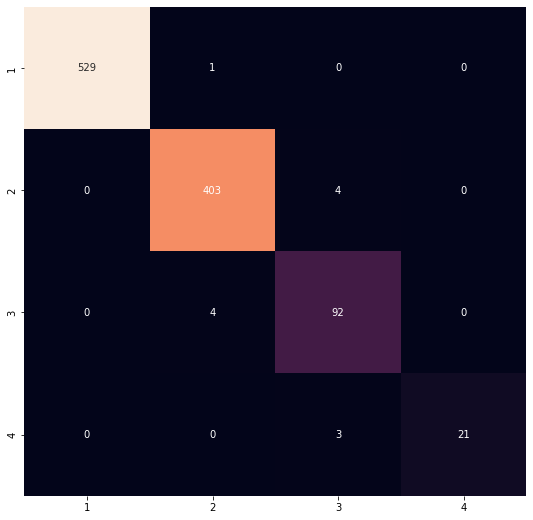

In [12]:
# Predicting the Val set results
y_predict_val = LG_classifier.predict(x_val)
cm = confusion_matrix(y_val, y_predict_val)
conf_matrix(cm)

In [13]:
print(classification_report(y_val, y_predict_val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       530
          25       0.99      0.99      0.99       407
          50       0.93      0.96      0.94        96
         100       1.00      0.88      0.93        24

    accuracy                           0.99      1057
   macro avg       0.98      0.96      0.97      1057
weighted avg       0.99      0.99      0.99      1057



In [14]:
a = 'Logistic Regression'
d = {'Model Name': [a],
             'Train Accuracy': [metrics.accuracy_score(y_train, y_predict_train)],
             'Validation Accuracy': [metrics.accuracy_score(y_val, y_predict_val)],
             'Accuracy Difference':[metrics.accuracy_score(y_train, y_predict_train)-metrics.accuracy_score(y_val, y_predict_val)]}
LG_scores_table = pd.DataFrame(data=d)
LG_scores_table

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Logistic Regression,0.995269,0.988647,0.006621


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

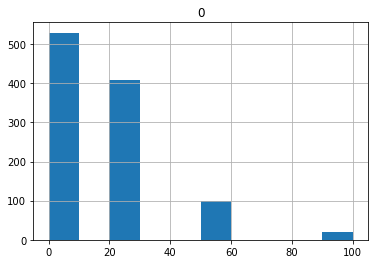

In [19]:
a = pd.DataFrame(LG_classifier.predict(x_val))
a.hist()

array([[<AxesSubplot:title={'center':'CDRGLOB'}>]], dtype=object)

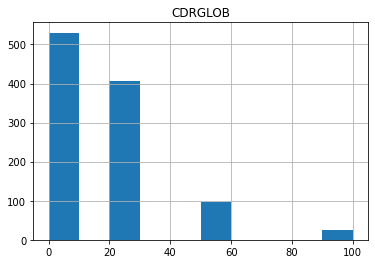

In [20]:
y_val.hist()

In [23]:
LG_classifier.predict(x_test)

array([ 25,  25,   0,   0,  25,   0,  25,   0,  25,  25,  50,   0,  25,
        25,   0,  25,  25,  25,  25,  25,   0,  25,   0,   0,   0,  50,
        25,  25,   0, 100,   0,  25,  25,   0,  25,  25, 100,  25,  25,
         0,  25,   0,   0,  25,  25,  25,   0,  25,   0,  25,   0,   0,
         0,  25,   0,  50,   0, 100,  25,  25,   0,  25,   0,   0,  50,
         0,   0,  50,   0,  50,   0,  50,   0,  50,  50,  25,  25,  25,
         0,  25,   0,  25,   0,  25,   0,   0,  25,  25,  50,  25,   0,
        25,  25, 100,  25,   0,  25,  25,  25,  50,  25,   0,   0,   0,
         0,  50,   0,  25,  25,   0,  25,   0,  25,   0,  25,   0,  25,
         0,   0,   0,   0,  25,   0,   0,  25,  25,   0,   0,   0,  25,
         0,  25,  25,   0,   0,  25,   0,  50,  25,  25,   0,  25,   0,
         0,  50,  25,   0,  25,  25,   0,  25,  25,  25,  50,  25,   0,
         0,   0,  25,   0,  50,   0,  25,   0,  25,   0,   0,   0,  25,
         0,   0,  25,   0,   0, 100,   0,   0,   0,  50,   0,  2

##### Devam